# 1. 随机森林使用

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import datasets
import graphviz

import numpy as np

In [2]:
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

## 1.1 一棵树

In [3]:
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    score += model.score(X_test,y_test)/100
    
print('一颗决策树平均得分是：',score)

一颗决策树平均得分是： 0.9135555555555548


In [4]:
X_train.shape

(133, 13)

## 1.2 随机森林（多棵树）

In [5]:
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    # 分类器 clf
    clf = RandomForestClassifier(n_estimators=100,max_depth=3) # 表示100棵树，组成了随机森林
    clf.fit(X_train,y_train)
    score += clf.score(X_test,y_test)/100
print('随机森林平均得分是：',score)

随机森林平均得分是： 0.9771111111111109


## 1.3 两种算法比较（准确率）

In [7]:
set(y)

{0, 1, 2}

In [6]:
model.predict_proba(X_test)[:5] # 一棵树，叶节点，落到哪个叶节点算作哪一类，概率：0,1

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [8]:
clf.predict_proba(X_test)[:5] # 概率 0.91,0.07，100棵树，进行投票

array([[0.01414609, 0.08981854, 0.89603536],
       [0.01541964, 0.84318489, 0.14139547],
       [0.00966471, 0.97668352, 0.01365178],
       [0.05415573, 0.01258855, 0.93325572],
       [0.01540494, 0.0244865 , 0.96010856]])

In [9]:
clf.feature_importances_

array([0.12505989, 0.02234987, 0.01655525, 0.01728588, 0.01838557,
       0.04590172, 0.18438149, 0.01598048, 0.02604045, 0.15446442,
       0.11538917, 0.09950704, 0.15869876])

随机森林主要步骤：
- 随机选择样本（放回抽样）；
- 随机选择特征；
- 构建决策树；
- 随机森林投票（平均）

优点:
- 表现良好
- 可以处理高维度数据(维度(即特征)随机选择)
- 辅助进行特征选择
- 得益于 Bagging 可以进行并行训练
  
缺点：
-  对于噪声过大的数据容易过拟合

## 1.4 可视化

### 单一决策树结构

In [10]:
# 单一决策树结构
dot_data = tree.export_graphviz(model,filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./单一决策树', format='png')

'单一决策树.png'

In [32]:
X_train.shape

(133, 13)

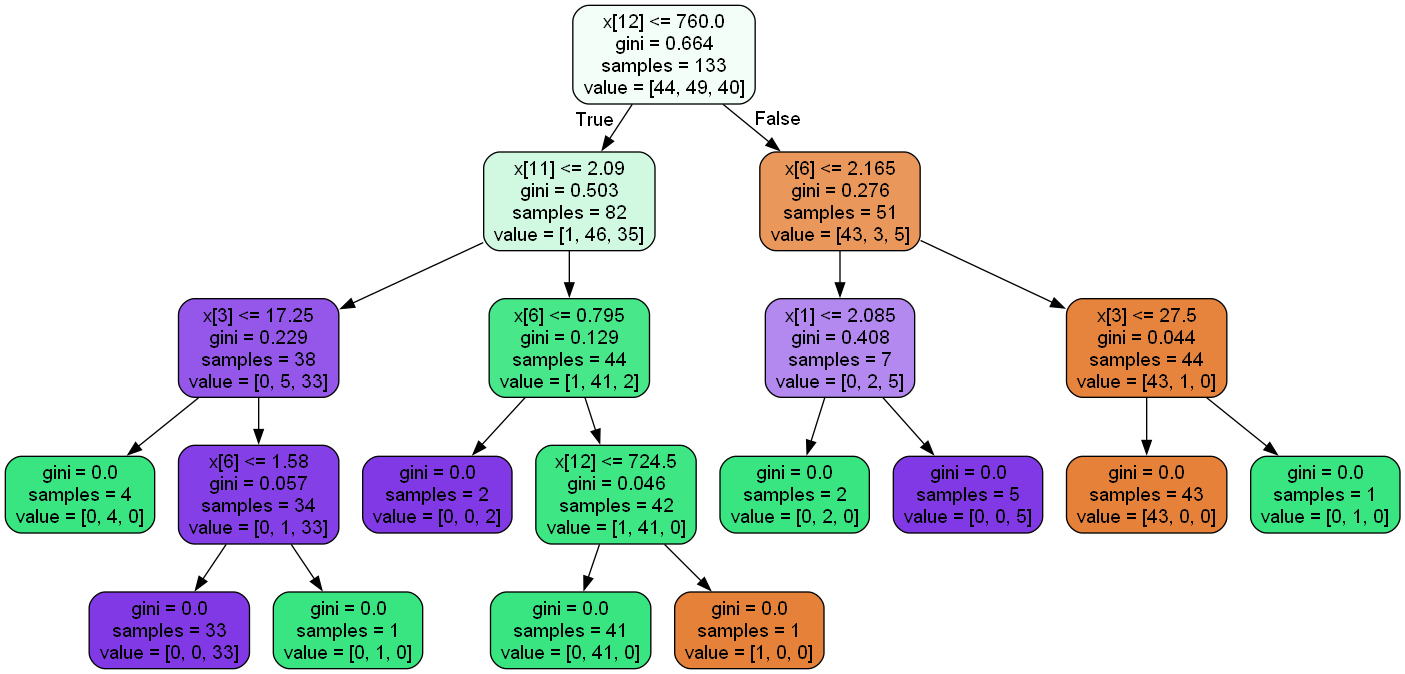

### 随机森林100棵

- 随机森林无法把所有样本画出来，但可以可以画出每一棵树

In [11]:
# 随机森林100棵
# 先画第一棵树
dot_data = tree.export_graphviz(clf[0],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./随机森林1', format='png')  # samples = 86  133个样本中抽了86个

'随机森林1.png'

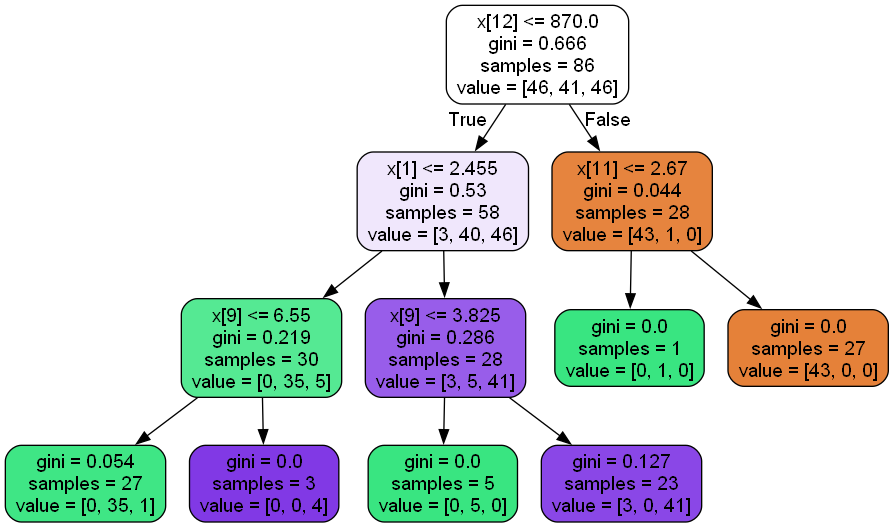

In [12]:
# 画第五十棵树
dot_data = tree.export_graphviz(clf[49],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./随机森林50', format='png')  # samples = 74  133个样本中抽了74个

'随机森林50.png'

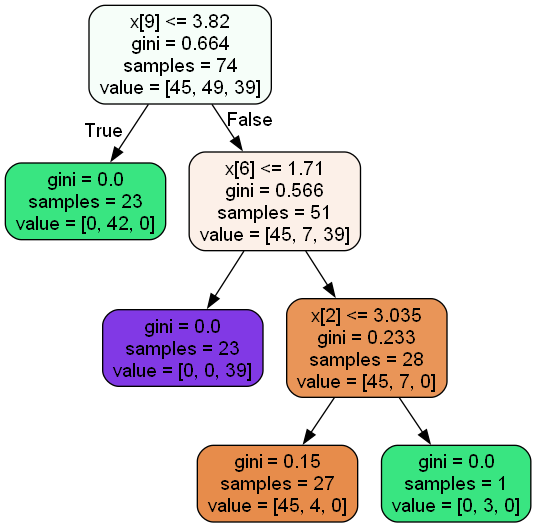

In [13]:
# 画最后一棵树
dot_data = tree.export_graphviz(clf[-1],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./随机森林100', format='png')  # samples = 87  133个样本中抽了87个

'随机森林100.png'

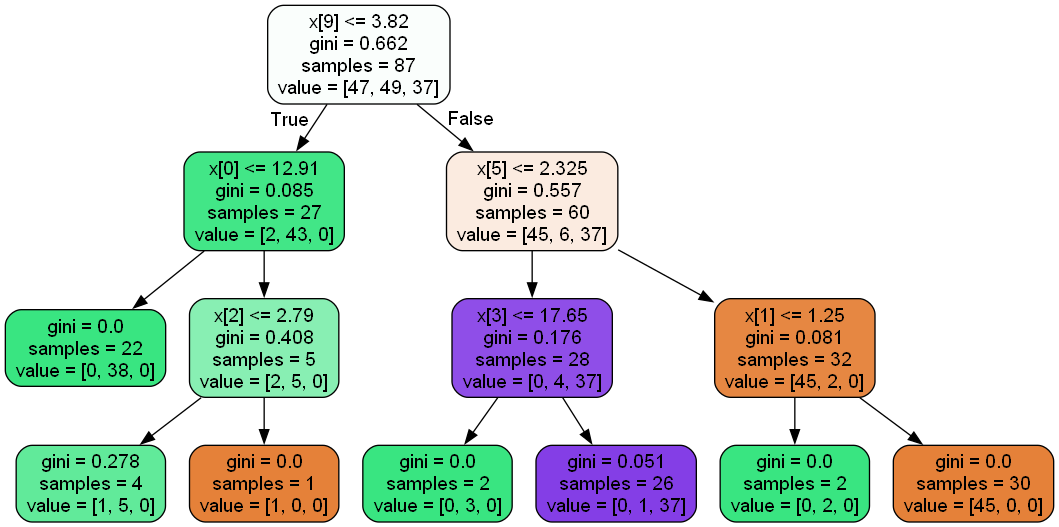

# 2. 极限森林

In [14]:
# 依然使用上面的数据
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y) # 葡萄酒的数据
    clf2 = ExtraTreesClassifier(max_depth = 3)
    clf2.fit(X_train,y_train)
    score += clf2.score(X_test,y_test)/100
print('极限森林平均得分是：',score)

极限森林平均得分是： 0.9762222222222221


In [ ]:
# 随机森林平均得分是： 0.9771111111111109
# 极限森林略微提升一点点

## 2.1 极限森林可视化

In [16]:
# 第一棵树
dot_data = tree.export_graphviz(clf2[0],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./极限森林1', format='png')  # samples = 133  使用全部133个样本

'极限森林1.png'

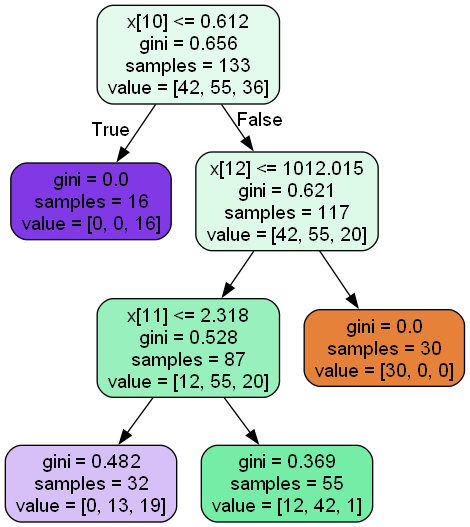

In [17]:
# 第50棵树
dot_data = tree.export_graphviz(clf2[49],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./极限森林50', format='png')  # samples = 133  使用全部133个样本

'极限森林50.png'

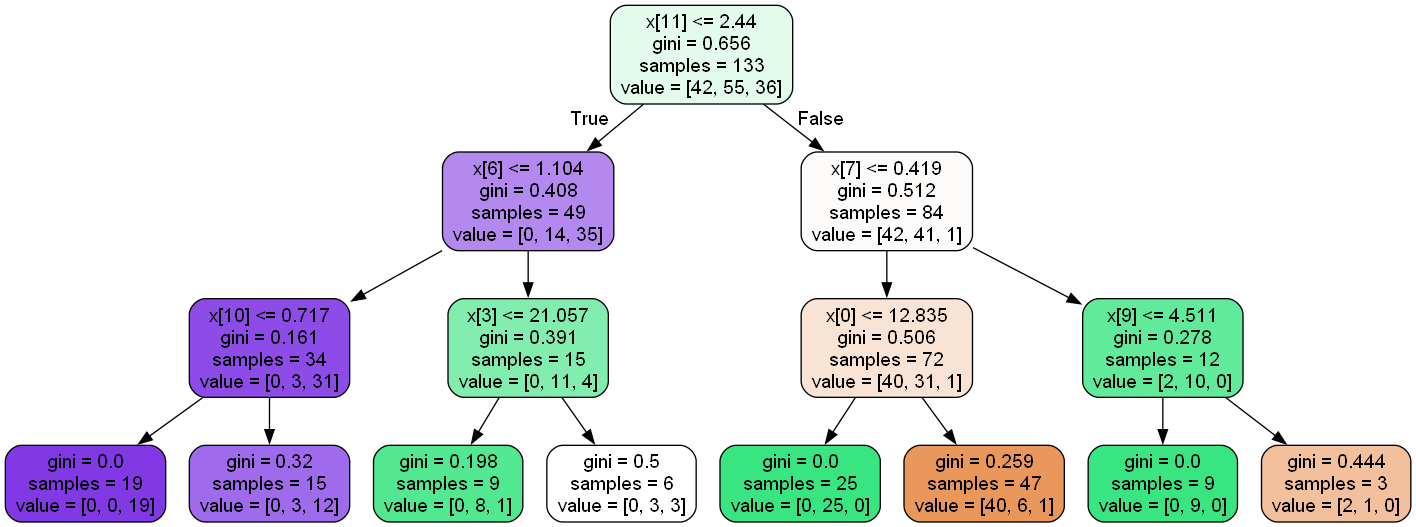

In [18]:
# 随机森林：随机抽样
# 极限森林：使用所有样本
# 第100棵树
dot_data = tree.export_graphviz(clf2[-1],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./极限森林100', format='png')  # samples = 133  使用全部133个样本

'极限森林100.png'

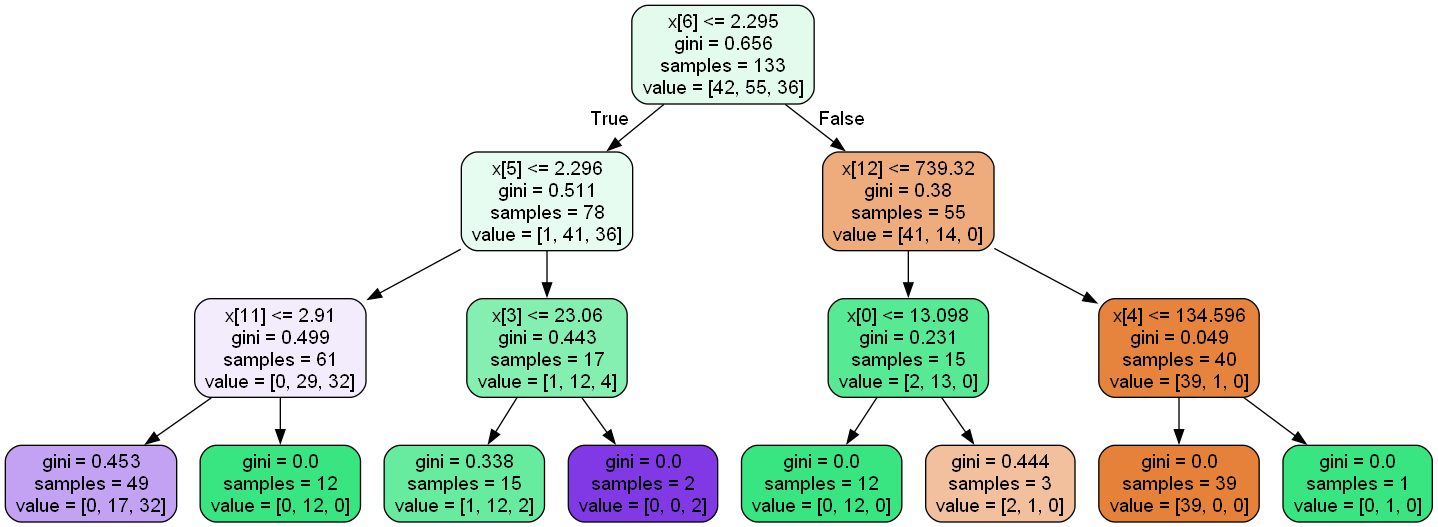

## 2.2 计算未分裂gini系数

In [27]:
set(y)  # 葡萄酒分了3类

{0, 1, 2}

In [20]:
count = []
for i in range(3):
    count.append((y_train == i).sum())
    print(count)
count = np.array(count)
count  # 类别0有42个，类别1有55个

[42]
[42, 55]
[42, 55, 36]


array([42, 55, 36])

In [21]:
count = []
for i in range(3):
    count.append((y_train == i).sum())
count = np.array(count)
p = count / count.sum()
gini = (p * (1 - p)).sum()
print('未分裂，gini系数是：',round(gini,3))

未分裂，gini系数是： 0.656


- 极限森林的最佳裂分特征是 X【10】，根据gini系数（默认）计算

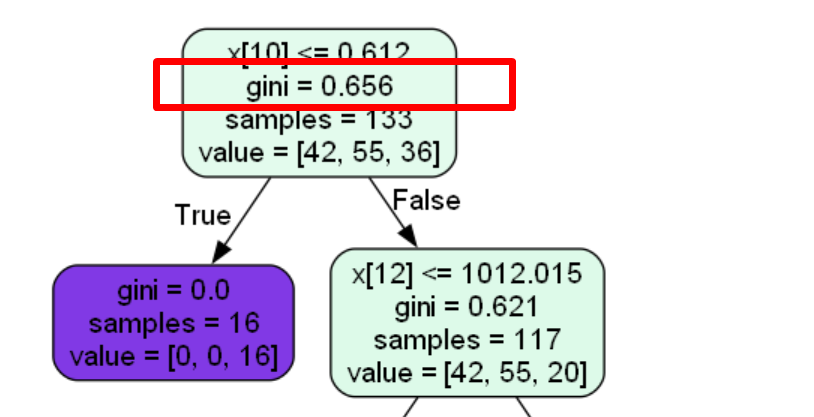

# 3. 计算gini系数

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y)  # 葡萄酒的数据

## 3.1 决策树

In [40]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train,y_train)

dot_data = tree.export_graphviz(model,filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./决策树gini', format='png')  # samples = 133  使用全部133个样本

'决策树gini.png'

In [ ]:
# 决策树的分裂是根据gini系数最小化来进行裂分的
# 最佳裂分点是属性 12 
# 决策树这里无论运行多少次，选择的结果都是 属性12 （除非重新划分训练集和测试集）

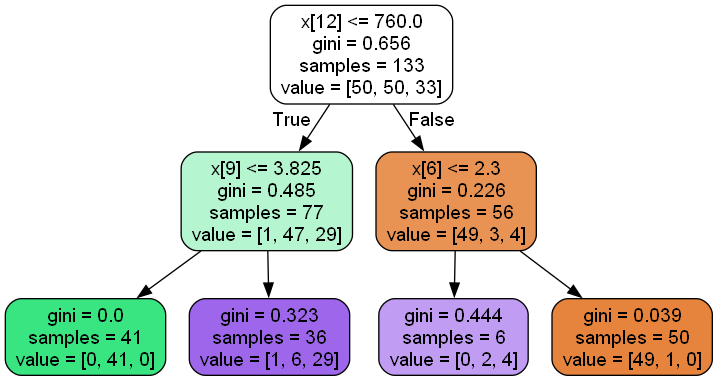

### 3.1.1 未裂分时数据的gini系数

In [41]:
count = []
for i in range(3):
    count.append((y_train == i).sum())
count = np.array(count)
p = count / count.sum()
gini = (p * (1 - p)).sum()
print('未分裂，gini系数是：',round(gini,3))

未分裂，gini系数是： 0.656


### 3.1.2 选择最佳裂分点

In [ ]:
# 如上图，验证x[12]的最佳裂分点是 760

In [29]:
X_train.shape

(133, 13)

In [30]:
set(y)

{0, 1, 2}

In [33]:
X_train[:,12].shape

(133,)

In [31]:
np.sort(X_train[:,12])[1:3]

array([1.9 , 1.95])

In [47]:
f = np.sort(X_train[:,12])  # 简化，根据画出的图，只取第12列； 按第12列的数值排序
                           # axis= The default is -1, which sorts along the last axis.
gini_lower = 1
best_split = {}
for i in range(len(f) - 1):  # 0~132(不含)
    split = round(f[i:i+2].mean(),3)
    cond = X_train[:,12] <= split 
    part1 = y_train[cond]
    part2 = y_train[~cond]
    # 计算每一部分gini系数
    count1 = []
    count2 = []
    for j in range(3):
        count1.append((part1 == j).sum())
        count2.append((part2 == j).sum())
    count1,count2 = np.array(count1),np.array(count2)
    p1 = count1 / count1.sum()
    p2 = count2 / count2.sum()
    gini1 = round((p1*(1-p1)).sum(),3)
    gini2 = round((p2*(1-p2)).sum(),3)
    # 计算整体的gini系数
    gini = round(gini1*count1.sum()/(y_train.size) + gini2*count2.sum()/(y_train.size),3)
    if gini <= gini_lower:
        gini_lower = gini
        best_split.clear()
        best_split['最佳裂分点是'] = split
    # print(split,gini1,gini2,gini,count1,count2)
print(best_split,gini_lower)

{'最佳裂分点是': 760.0} 0.376


In [49]:
# 裂分前的gini = 0.656
# 裂分后 gini = 0.376
np.round(0.485*77/133 + 0.226*56/133,3)

0.376

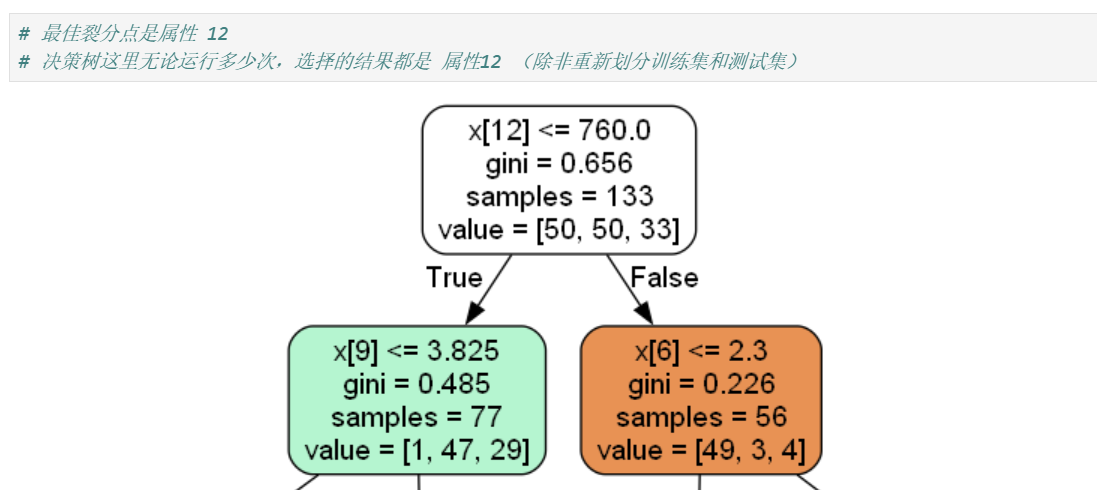

## 3.2 极限森林

- 决策树的分裂是根据gini系数最小化来进行裂分的，X_train和y_train固定后，无论执行多少次，结果都一样
- 极限森林：特征分裂随机，不同执行下的选择的分裂特征不一样

In [23]:
clf2 = ExtraTreesClassifier(max_depth=2)  # 默认 n_estimators=100
clf2.fit(X_train,y_train)

dot_data = tree.export_graphviz(clf2[0],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./极限森林clf2', format='png')  # samples = 133  使用全部133个样本

'极限森林clf2.png'

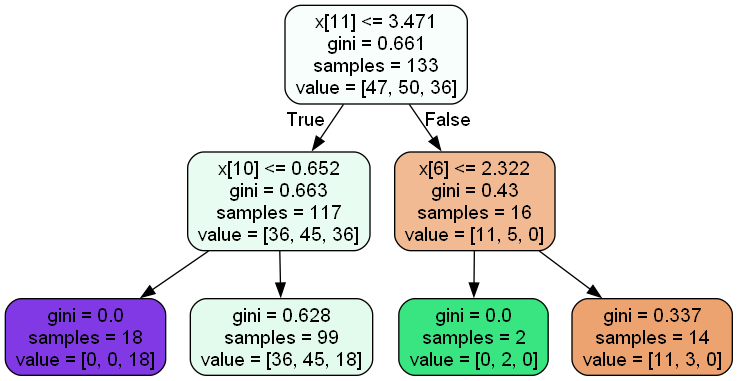

在极限随机树中（参见 ExtraTreesClassifier 和 ExtraTreesRegressor 类)， 计算分割点方法中的随机性进一步增强。 与随机森林相同，使用的特征是候选特征的随机子集；但是不同于随机森林寻找最具有区分度的阈值，这里的**阈值是针对每个候选特征随机生成的** ，并且选择这些随机生成的阈值中的最佳者作为分割规则。 这种做法通常能够减少一点模型的方差，代价则是略微地增大偏差：

In [52]:
clf2 = ExtraTreesClassifier(max_depth=2)  # 默认 n_estimators=100
clf2.fit(X_train,y_train)

dot_data = tree.export_graphviz(clf2[0],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph.render('./极限森林clf22', format='png')  # samples = 133  使用全部133个样本

# 变成了x[12]   但选择的裂分点不是最优的 760，这里也加入了一定的随机性，多棵树配合，往往比单一的树表现得更加优秀

'极限森林clf22.png'

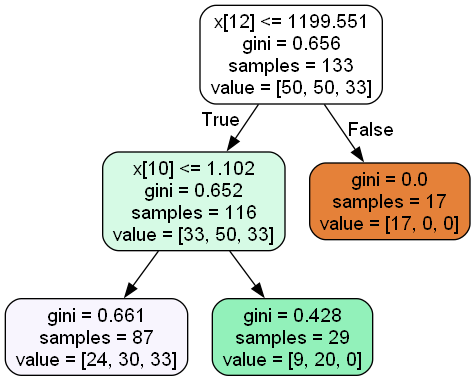